In [2]:
import geopandas as gpd
import xarray as xr
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import gzip
import shutil
import glob
import rioxarray as rxr

In [21]:
# Set data directory
data_dir = "../../datasets/et/lsa_saf"

In [3]:
# Read AOI vector file

gha_region = "../../datasets/gha/gha.shp"

## Evapotranspiration pre-processing

In [4]:
gha_et = xr.open_dataset("../../datasets/et/gha_lsa_et.nc")
gha_et

<xarray.Dataset>
Dimensions:                 (lat: 697, lon: 592, time: 252)
Coordinates:
  * lat                     (lat) float32 23.1 23.05 23.0 ... -11.6 -11.65 -11.7
  * lon                     (lon) float32 21.85 21.9 21.95 ... 51.3 51.35 51.4
  * time                    (time) datetime64[ns] 2004-01-01 ... 2024-12-01
Data variables:
    crs                     int64 ...
    ET                      (time, lat, lon) float64 ...
    max_nslots_missing      (time, lat, lon) float64 ...
    missing_values_percent  (time, lat, lon) float64 ...
Attributes: (12/27)
    date_created:               2023-03-06T11:15:29Z
    algorithm_version:          2.0.1
    base_algorithm_version:     0.5.4
    processing_level:           04
    platform:                   MSG1
    sensor:                     SEVI
    ...                         ...
    westernmost_longitude:      80.0
    spatial_resolution:          0.05x 0.05
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    Conventions:                CF-1.6
    netcdf_version_id:          netCDF4

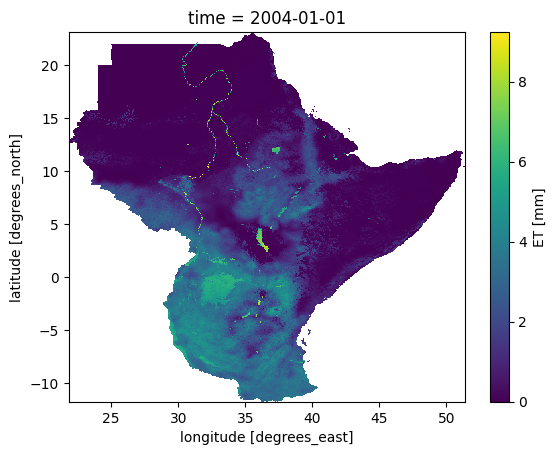

In [5]:
gha_et.ET.isel(time=0).plot()

#### Climatology - Calculate the anomalies

In [8]:
# Calculate monthly climatology (mean for each month over the years)
et_climatology = gha_et.groupby("time.month").mean("time")

# Calculate anomalies
et_anomalies = gha_et.groupby("time.month") - et_climatology

# Calculate monthly standard deviation over the years
et_std = gha_et.groupby("time.month").std("time")

# Calculate standardized anomalies
standardized_anomalies = et_anomalies / et_std


In [9]:
standardized_anomalies

<xarray.Dataset>
Dimensions:                 (lat: 697, lon: 592, time: 252, month: 12)
Coordinates:
  * lat                     (lat) float32 23.1 23.05 23.0 ... -11.6 -11.65 -11.7
  * lon                     (lon) float32 21.85 21.9 21.95 ... 51.3 51.35 51.4
  * time                    (time) datetime64[ns] 2004-01-01 ... 2024-12-01
  * month                   (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    crs                     (time, month) float64 nan nan nan ... nan nan nan
    ET                      (time, lat, lon, month) float64 nan nan ... nan nan
    max_nslots_missing      (time, lat, lon, month) float64 nan nan ... nan nan
    missing_values_percent  (time, lat, lon, month) float64 nan nan ... nan nan

In [ ]:
# TODO: Implement fitting marginal distribution to the data

# Subset data for a bounding box (e.g., Greater Horn of Africa)
region = et_anomalies['ET'].sel(lon=slice(33, 43), lat=slice(5, -5))

# Calculate mean precipitation over space or time within the region
region_mean_time = region.mean(dim=["lon", "lat"])
region_mean_time.plot.hist(bins=30)
plt.title("Regional Mean ET Over Time")
plt.ylabel("Precipitation (mm)")
plt.show()